In [14]:
# Libraries
library(Seurat, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(SeuratHelper, quietly=TRUE)
library(cowplot)

In [7]:
devtools::load_all("~/projects/SeuratHelper")

ℹ Loading SeuratHelper


In [2]:
# Variables
data_dir <- "../data/JSS2020_blood/"
in_file <- paste0(data_dir, "pbmc.rds")
plot_dir <- "../analysis/reference_jss-2020-blood/"
dir.create(plot_dir)
out_file <- paste0(data_dir, "ref_jss-2020-blood.Rds")

Warning message in dir.create(plot_dir):
“'../analysis/reference_jss-2020-blood' already exists”


In [3]:
# Read data
ds <- readRDS(in_file)

In [20]:
# Add QC metrics
ds <- add_qc_metrics(ds)

Warning message in plot_embedding(ds, embedding = emb):
“Expression/metadata for '' not found.”


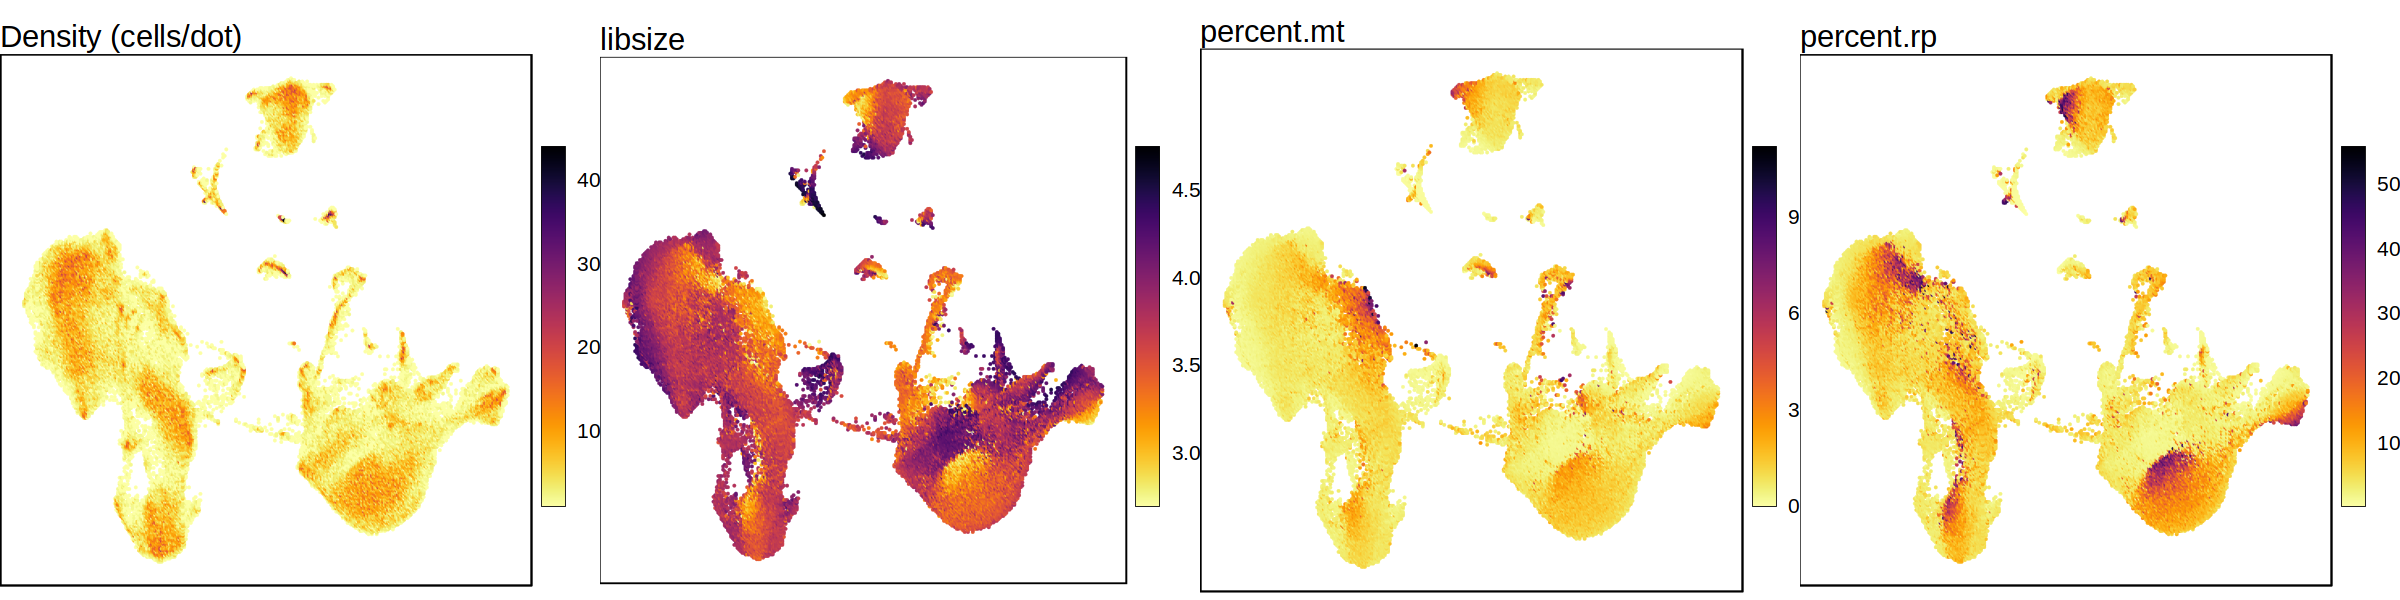

In [21]:
# Plot
options(repr.plot.width=20, repr.plot.height=5)
emb <- "umap"
cowplot::plot_grid(
    plot_embedding(ds, embedding=emb),
    plot_embedding(ds, "libsize", embedding=emb, color.transform="log10"),
    plot_embedding(ds, "percent.mt", embedding=emb),
    plot_embedding(ds, "percent.rp", embedding=emb), nrow = 1
)

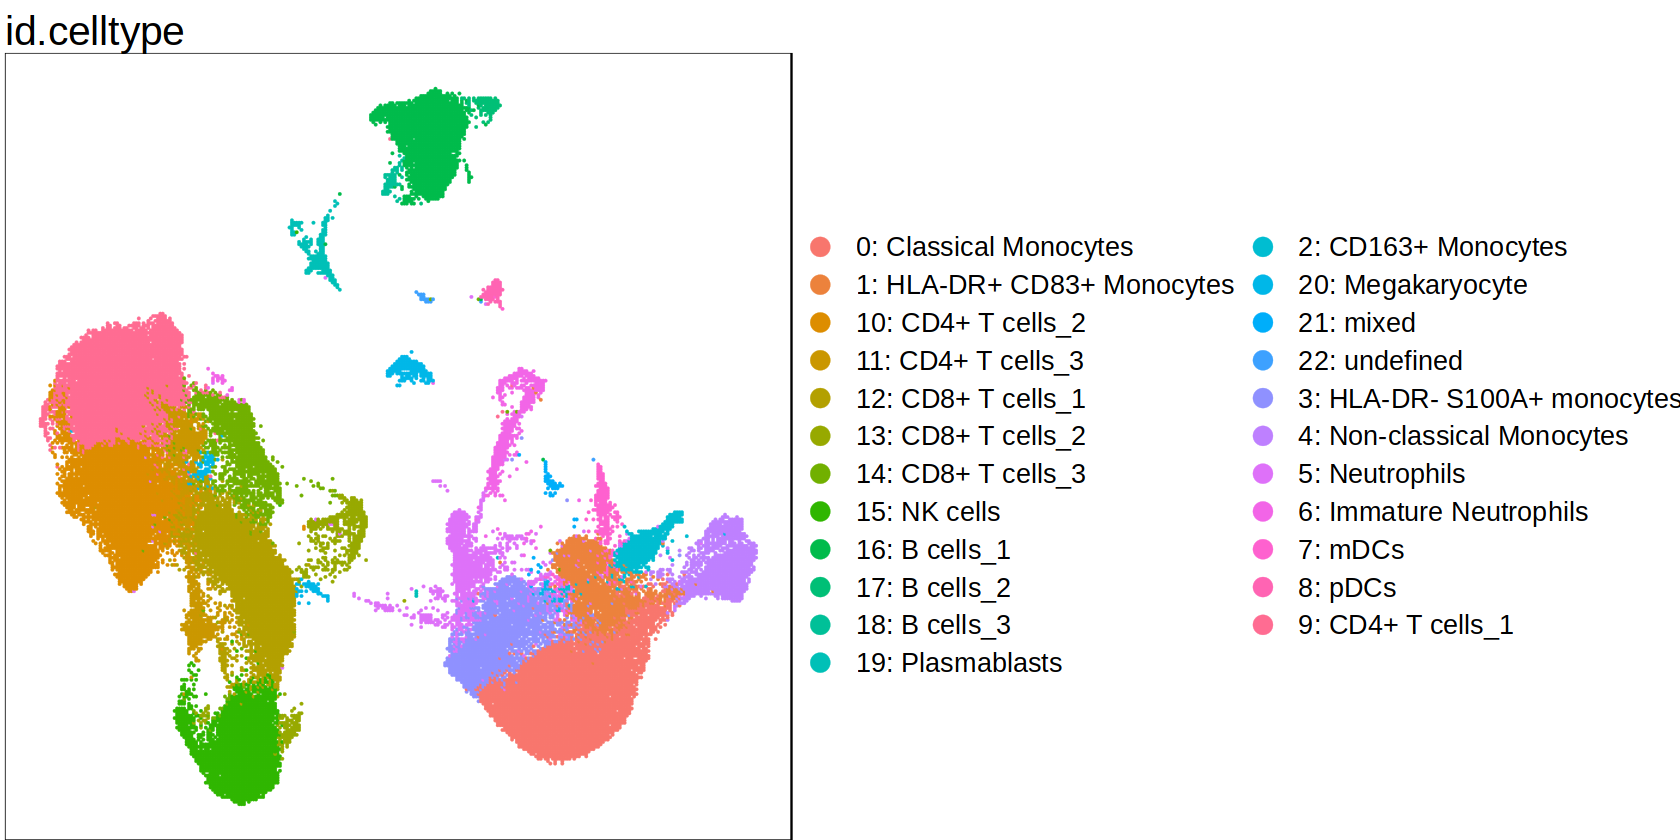

In [42]:
# Plot
options(repr.plot.width=14, repr.plot.height=7)
plot_embedding(ds, "id.celltype", embedding="umap", legend.cols = 2, theme.size=20)

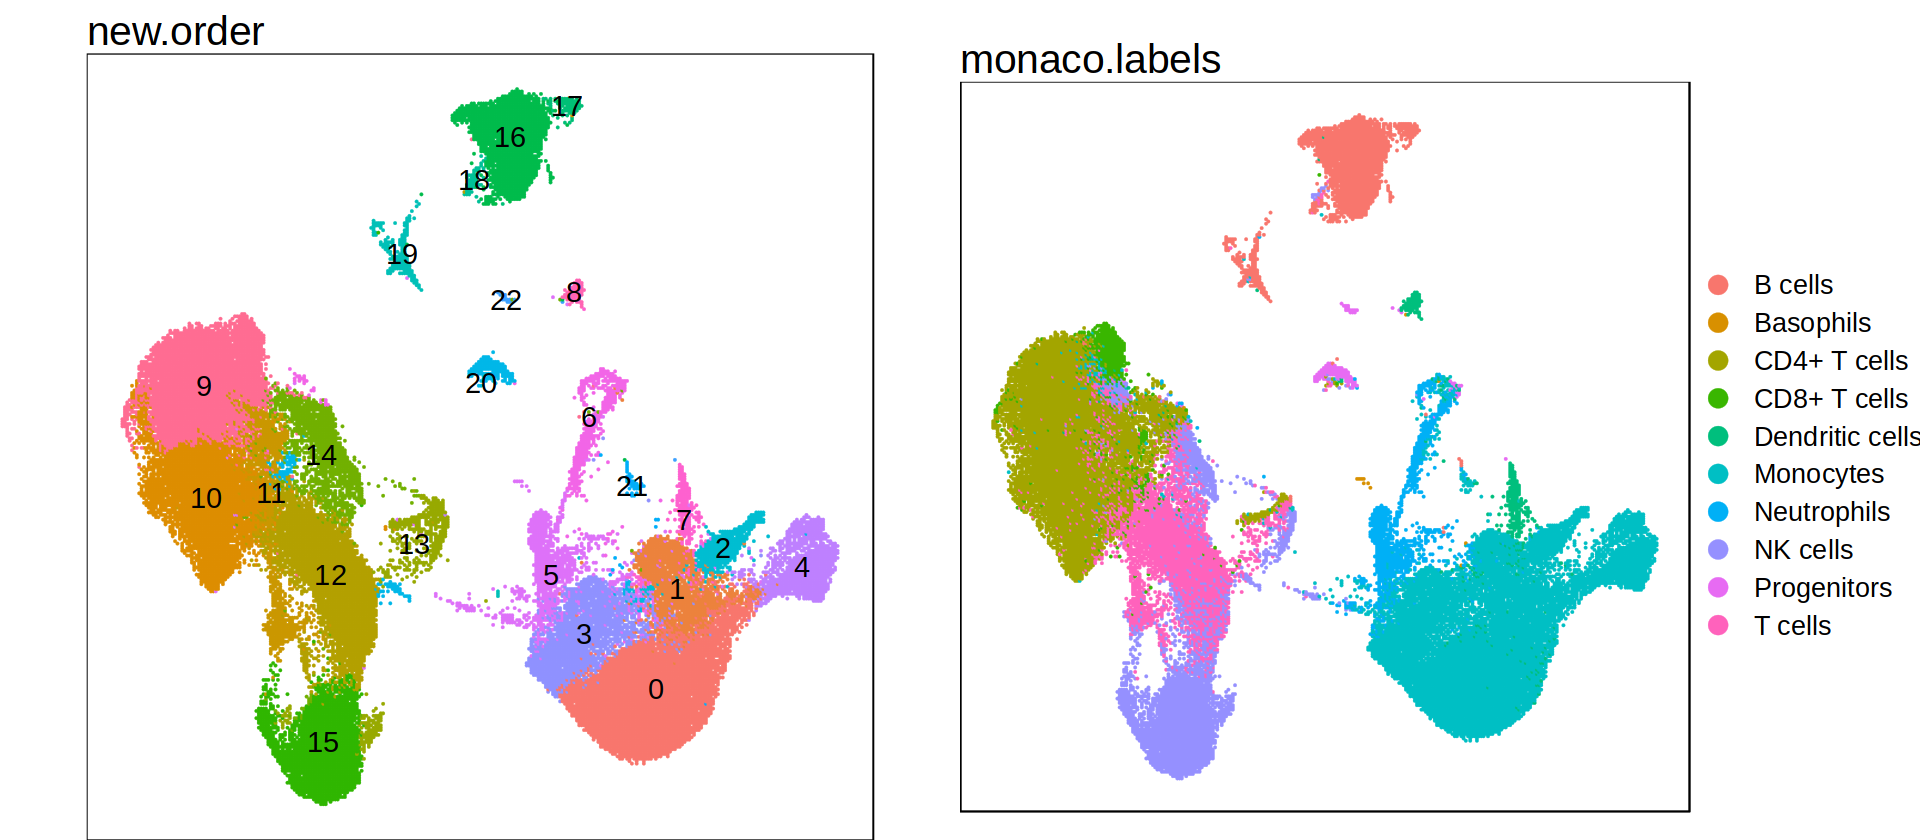

In [38]:
# Plot
options(repr.plot.width=16, repr.plot.height=7)
pl <- list(
    plot_embedding(ds, "new.order", embedding="umap", theme.size=20, label = "text"),
    plot_embedding(ds, "monaco.labels", embedding="umap", theme.size=20)
)
cowplot::plot_grid(plotlist = pl)

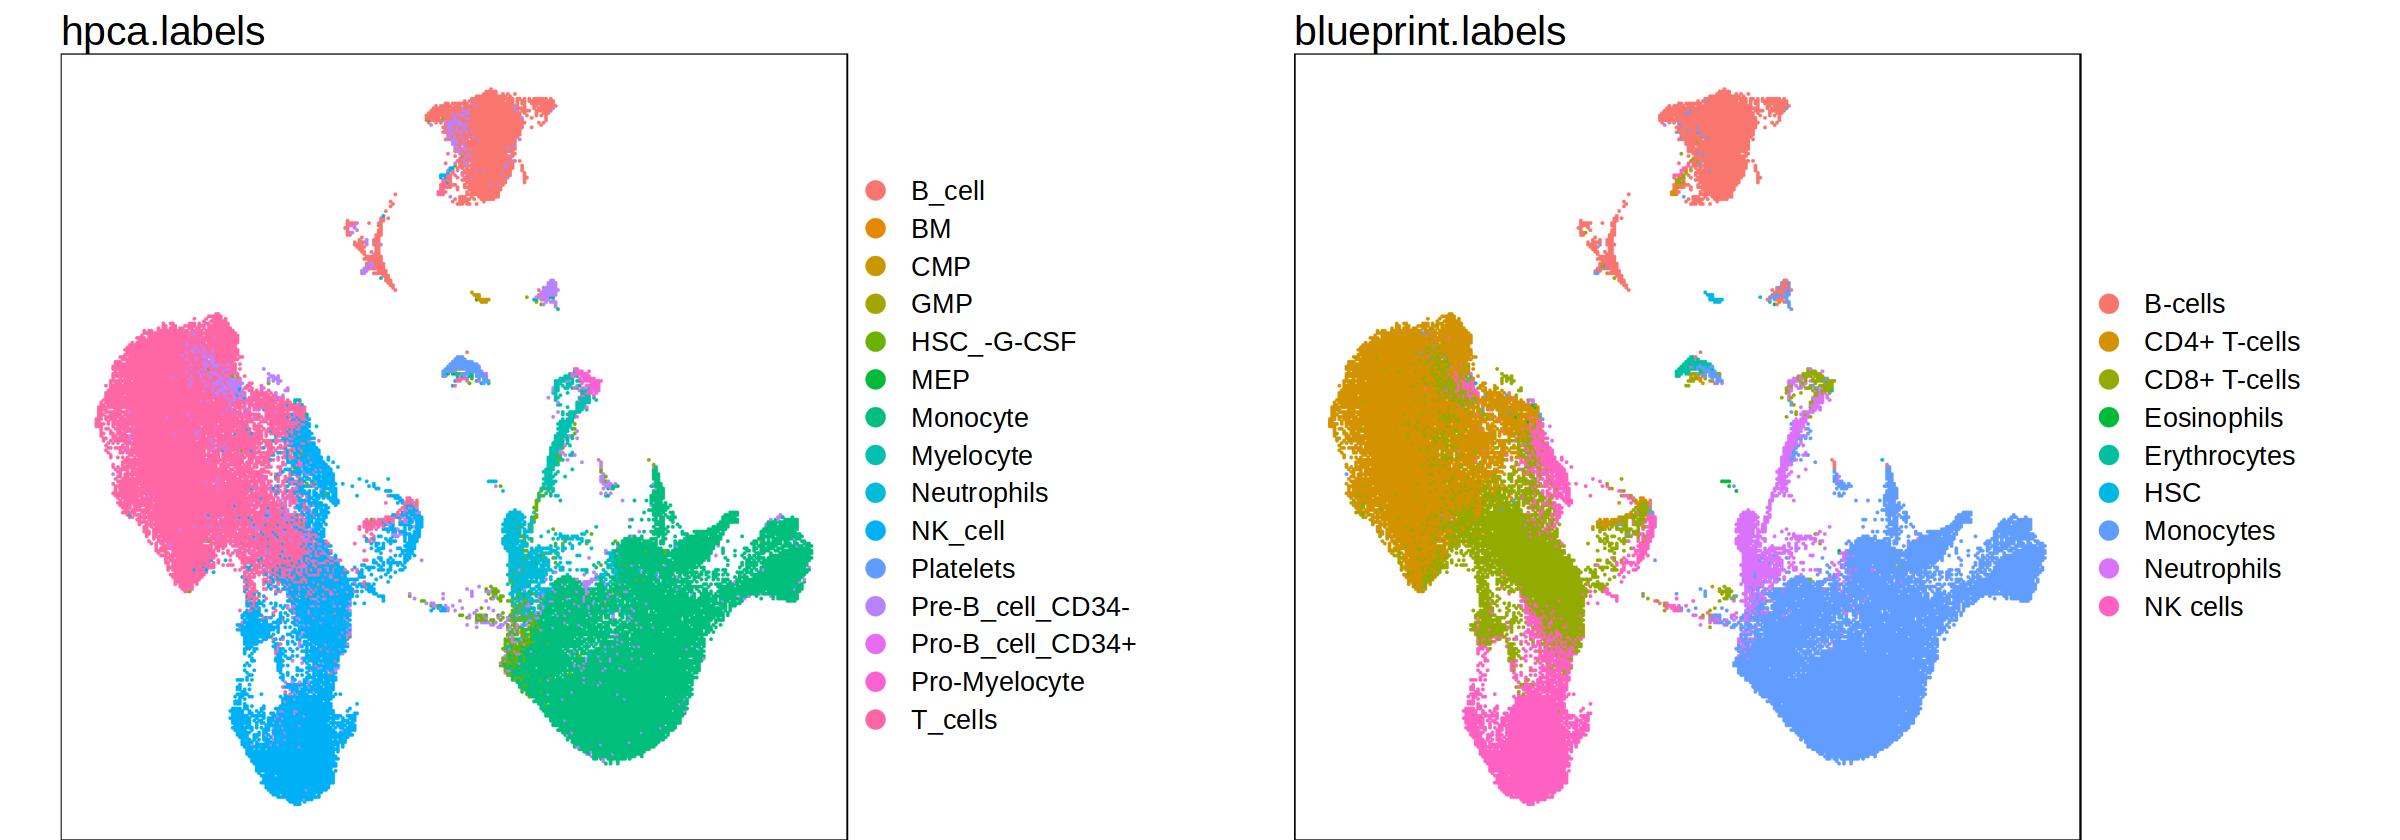

In [37]:
# Plot
options(repr.plot.width=20, repr.plot.height=7)
pl <- list(
    plot_embedding(ds, "hpca.labels", embedding="umap", legend.cols = 1, theme.size = 20),
    plot_embedding(ds, "blueprint.labels", embedding="umap", theme.size=20)
)
cowplot::plot_grid(plotlist = pl)

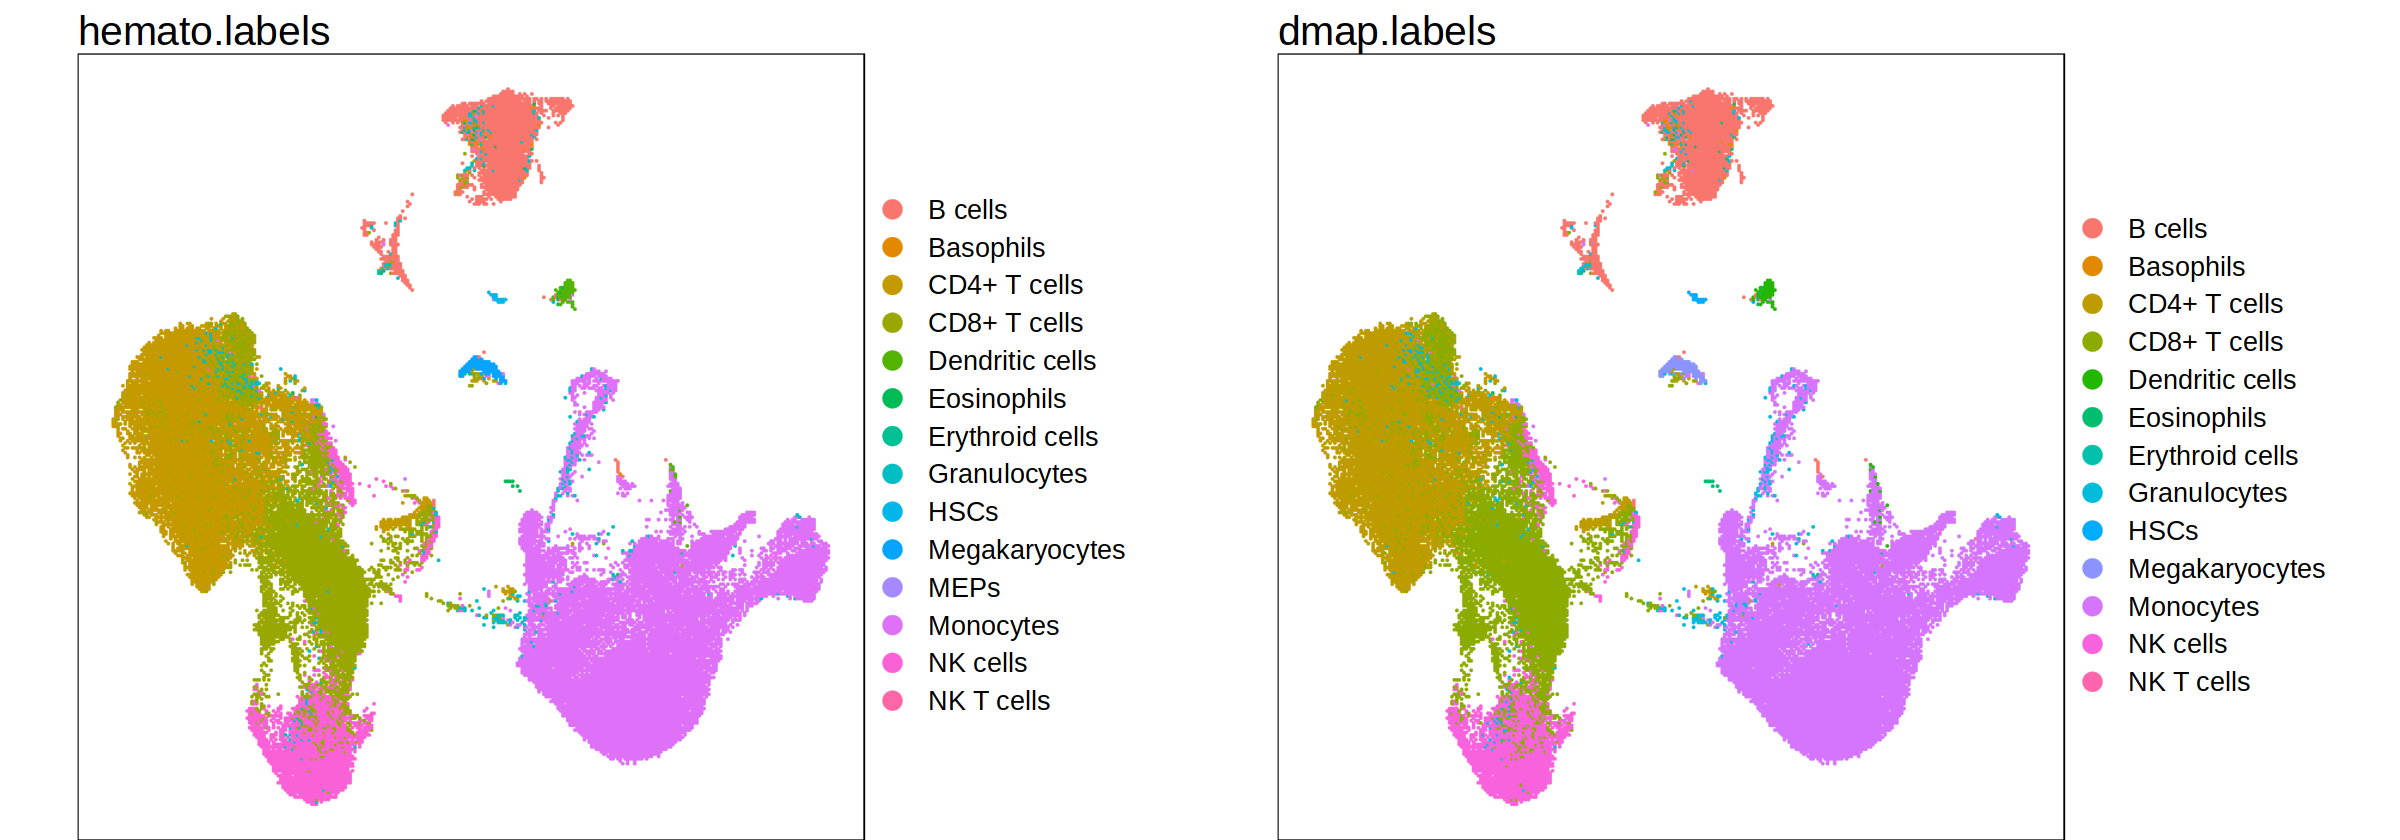

In [44]:
# Plot
options(repr.plot.width=20, repr.plot.height=7)
pl <- list(
    plot_embedding(ds, "hemato.labels", embedding="umap", theme.size=20, legend.cols=1),
    plot_embedding(ds, "dmap.labels", embedding="umap", theme.size=20, legend.cols = 1)
)
cowplot::plot_grid(plotlist = pl)

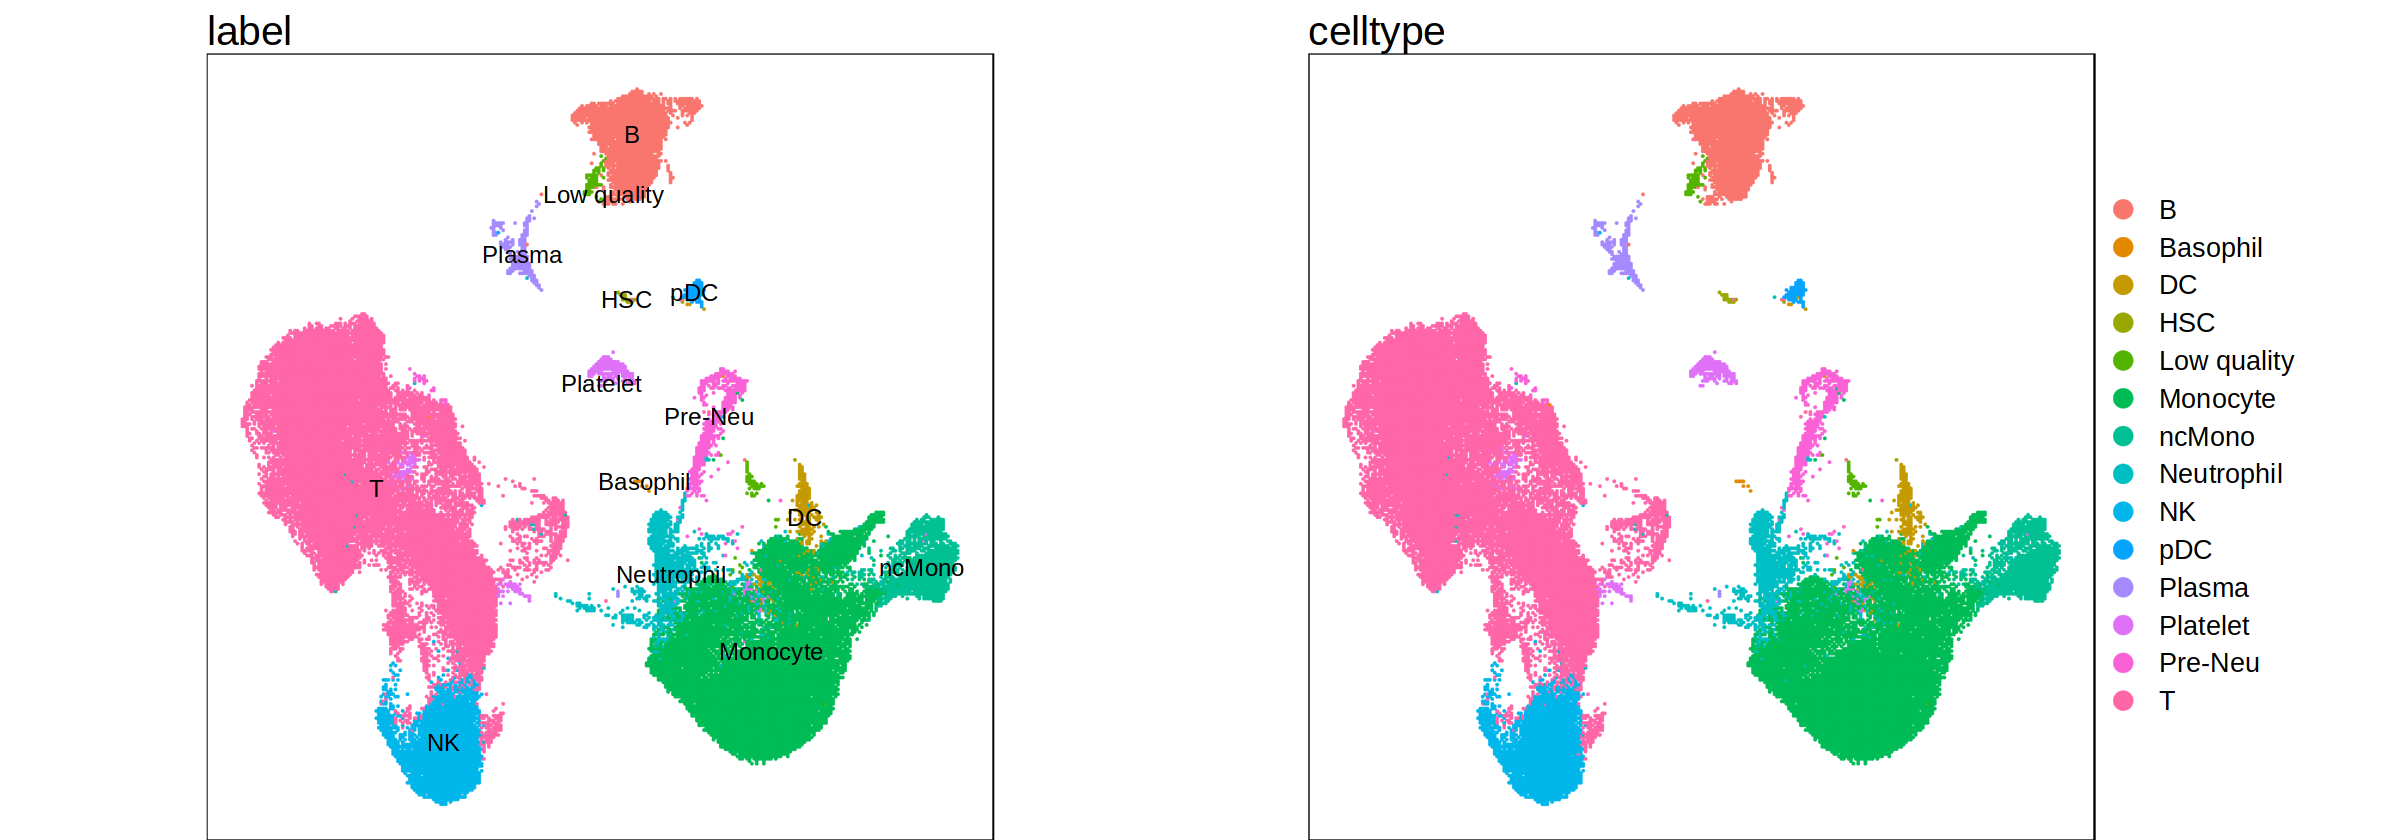

In [63]:
# Combine cell types to new annotation level
ds$label <- as.character(ds$new.order)
ds$label[ds$new.order %in% c(0:3)] <- "Monocyte"
ds$label[ds$new.order == 4] <- "ncMono"
ds$label[ds$new.order == 5] <- "Neutrophil"
ds$label[ds$new.order == 6] <- "Pre-Neu"
ds$label[ds$new.order == 7] <- "DC"
ds$label[ds$new.order == 8] <- "pDC"
ds$label[ds$new.order %in% c(9:14)] <- "T"
ds$label[ds$new.order == 15] <- "NK"
ds$label[ds$new.order %in% c(16:17)] <- "B"
ds$label[ds$new.order == 18] <- "Low quality"
ds$label[ds$new.order == 19] <- "Plasma"
ds$label[ds$new.order == 20] <- "Platelet"
ds$label[ds$new.order == 21] <- "Low quality"
ds$label[ds$new.order == 22] <- "HSC"
ds$label[ds$monaco.labels == "Basophils"] <- "Basophil"
ds$celltype <- ds$label

# Plot
options(repr.plot.width=20, repr.plot.height=7)
pl <- list(
    plot_embedding(ds, "label", embedding="umap", theme.size=20, label = "text", label.size = 5),
    plot_embedding(ds, "celltype", embedding="umap", theme.size=20, legend.cols = 1)
)
cowplot::plot_grid(plotlist = pl)

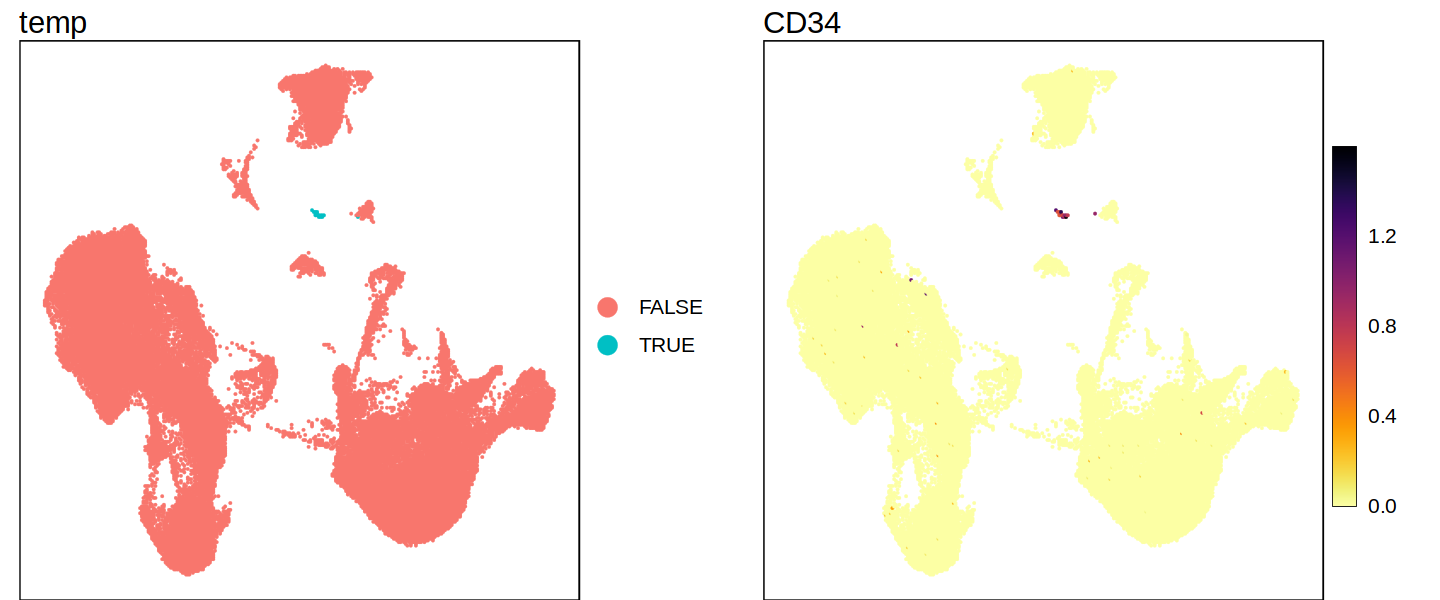

In [51]:
# Plot gene expression
ds$temp <- ds$hemato.labels == "HSCs"
options(repr.plot.width=12, repr.plot.height=5)
pl <- list(
    plot_embedding(ds, "temp", embedding="umap"),
    plot_embedding(ds, "CD34", embedding="umap")
)
cowplot::plot_grid(plotlist = pl)

[1] "orig.ident"                                     
 [2] "nCount_RNA"                                     
 [3] "nFeature_RNA"                                   
 [4] "nReads_RNA"                                     
 [5] "nReads_ALL"                                     
 [6] "percent.mito"                                   
 [7] "percent.hb"                                     
 [8] "donor"                                          
 [9] "onset_of_symptoms"                              
[10] "days_after_onset"                               
[11] "sampleID"                                       
[12] "origID"                                         
[13] "date_of_sampling"                               
[14] "DaysAfterSample0"                               
[15] "experiment"                                     
[16] "PoolID"                                         
[17] "sampletag"                                      
[18] "hash.ID"                                        
[19] "platform"                                       
[20] "purification"                                   
[21] "cells"                                          
[22] "age"                                            
[23] "sex"                                            
[24] "group_per_sample"                               
[25] "who_per_sample"                                 
[26] "disease_stage"                                  
[27] "outcome"                                        
[28] "comorbidities"                                  
[29] "COVID.19.related_medication_and_anti.microbials"
[30] "RNA_snn_res.0.4"                                
[31] "cluster_labels_res.0.4"                         
[32] "new.order"                                      
[33] "id.celltype"                                    
[34] "hpca.labels"                                    
[35] "blueprint.labels"                               
[36] "monaco.labels"                                  
[37] "immune.labels"                                  
[38] "dmap.labels"                                    
[39] "hemato.labels"                                  
[40] "libsize"                                        
[41] "ngenes"                                         
[42] "percent.mt"                                     
[43] "percent.rp"                                     
[44] "label"                                          
[45] "temp"                                           
[46] "batch"                                          
[47] "celltype"                                       
[48] "medication"                                     
[49] "source"

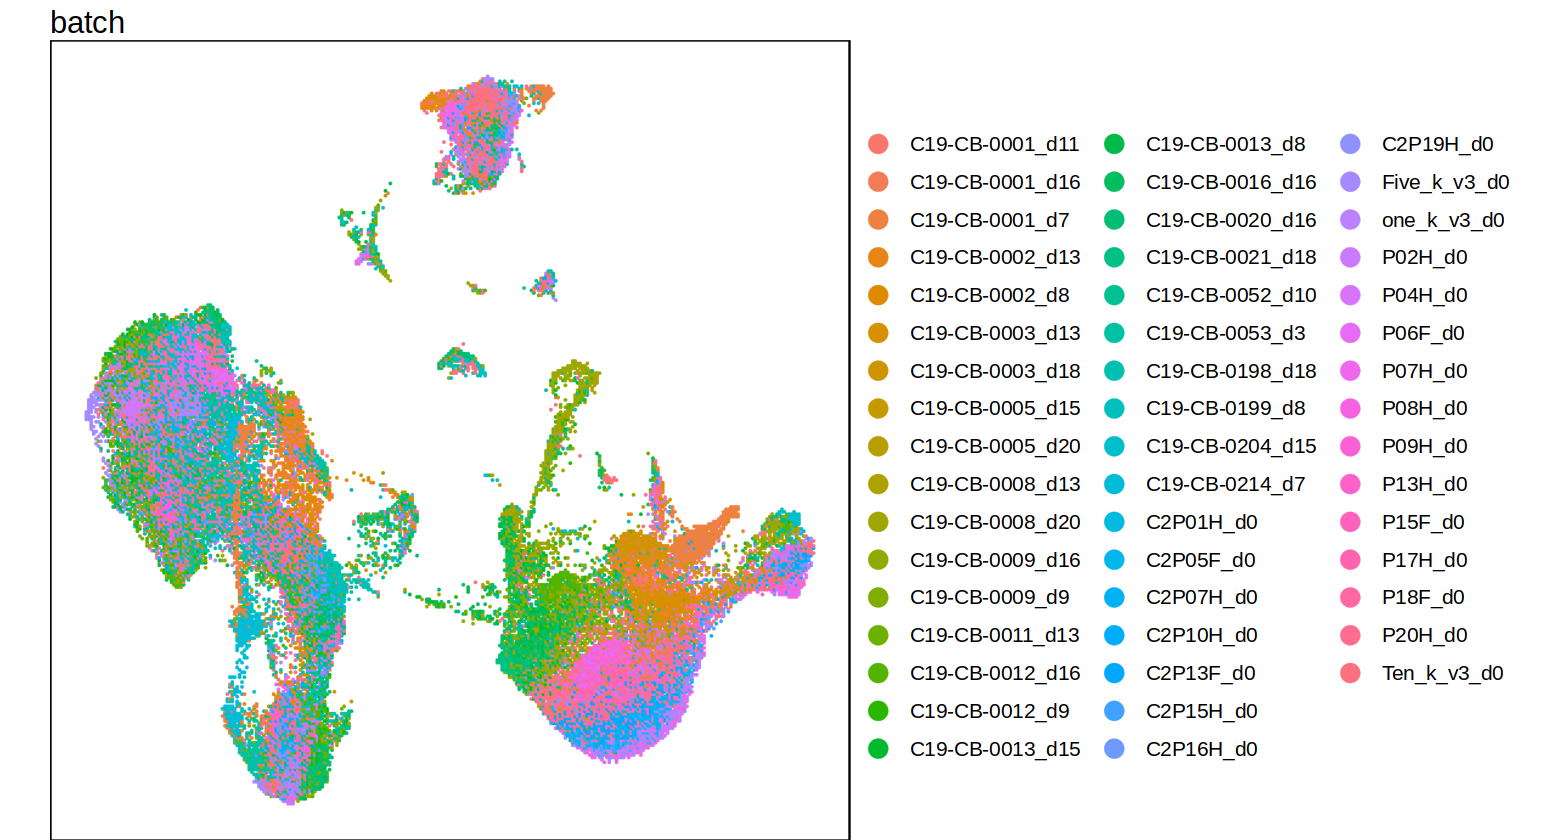

In [80]:
# Harmonize metadata
names(ds@meta.data)
ds$batch <- ds$sampleID
ds$medication <- ds$COVID.19.related_medication_and_anti.microbials
ds$source <- "JSS"
options(repr.plot.width=13, repr.plot.height=7)
plot_embedding(ds, "batch", embedding="umap", legend.cols = 3)

In [82]:
# Save data
saveRDS(ds, out_file)